# Chapter 6 - Forecasting Numeric Data. Regression Methods

Lantz, B. (2019) - Machine Learning with R. Expert techniques for predicitive modeling. [p. 167 - 216]

Using real-world data and prediction tasks, this chapter gives an introduction to techniques for estimating relationships among numeric data. This includes:

*   The basics of regression analysis, a set of statistical processes for modelling the size and strength of numeric relationships.
*   How to prepare data and interpret the regression models.
*   An overview of different techniques on how to adapt decision tree classifiers for numeric prediction tasks.

**Vorwissen über decision tree classifiers ist von vorteil (chapter 5).**

---

## Part A - Basics of regression analysis

Regression analysis is amongst the most widely used methods in science and especially machine learning. In particular, it can helpt to gain insight about a set of data which can helpt to explain the past and extrapolate into the future. This method can be applied to scientific studies, such as in the fields of economics, physics or psychology, for example to quantify the relationship between a dependent variable (the value to be predicted) and one or more independent variables (the predictors), or to identify patterns that can be used to forecast future behaviour. In statistical modelling this process is known as regression analysis, which will be introduced in the following sections. 

### Understanding regression

Recall that a line in the classical cartesian xy-plane can be defined in the form
$$
y=a+bx
$$
where $y$ indicates the dependent variable ($y$ is to be predicted) and $x$ the indipendent variable (the predictor). The slope of that line is specified by the term $b$ and indicates an increasing line if positive, and a decreasingand if negative. The intercept with the y-axis is given by the term $a$ (when $x=0$).

In machine learning a similar format of that equation is used, where the purpose of the machine is to identify values of $a$ and $b$ such that the specified line is able to describe the relationship between the supplied values $x$ to the values of $y$ in the best possible way. In practice it is rarely the case that the function perfectly relates those values, so the machine quantifies this error with an additional term. Hence, the smaller that error term, the better is the function to explain the relationship between the $y$ and $x$. 

This chapter focuses on the most basic regression models, the so-called **linear** regression models, since they use straight lines to explain the relationships. In the case of only one independent variable ($x_1$) it is called a **simple** linear regression, in the case of two or more independent variables ($x_1, x_2, ..., x_n$) it is known as **multiple** linear regression. 

## Simple linear regression

A simple linear regression model uses a line defined by an equation in the form

$$
y = \alpha + \beta x
$$

to explain the relationship between a dependent variable and a single independent variable. This equation is identical to the equation described previously, beside from the Greek characters which indicate variables that are parameters of statistical functions. As stated above, those parameters (or its estimates) however can be evaluated by performing a regression analysis. Using data from the space shuttle "Challenger" launch in 1986 (which went terribly wrong) will give a glimpse how such an analysis can help to gain insight about the data and to test hypotheses. 

Hence, a regression model that demonstrates the connection between O-ring failures (the dependent variable $y$) and the outside temperature during launch (the independent variable $x$, i.e. the predictor) could predict the possibility of failure given the expected temperature at launch. Since the parameters $\alpha$ and $\beta$ are necessary *ingredients* to form a line through the data set, finding their values is inevitable. As usual in real-world problems, finding an exact value, meaning the line passes through every measured data point exactly, is very unlikely. Instead, the line will rather somewhat evenly "cut" through the data. Therefore, the resulting values for the parameters (if error > 0) are considered *parameter estimates*. The best estimates are online the ones which generate the smallest error possible. To identify the optimal paramters such that the line is closest to the data points an estimation method known as **ordinary least squares (OLS)** is applied. 

Note that the term *line* is meant as the solucion space of the equation $y = \alpha + \beta$. Values on that line, i.e. the line itself, are predictions made by the regression model. If the observed data point is below or above the predicted solution, the error is greater than 0, since the vertical distance from the prediction to the true value is > 0.

## Ordinary least squares estimation

Estimating the optimal values for the parameters $\alpha$ and $\beta$ means finding the optimal value for the intercept $\alpha$ and the slope $\beta$ such that the deviation of the predicted values ($\hat{y}$) from the actual value ($y$) is as small as possible. Statistically speaking, *errors* are referred to as **residuals**. In OLS regression, the estimated values for the parameters are chosen such that the **sum of the squared errors (SSE)** is minimal. Mathematically speaking, the goal of OLS regression is to minimise following equation: 

$$
\sum{(y_i - \hat{y_i})^2} = \sum{e^2_i},
$$

where $y_i$ is the actual value and $\hat{y_i}$ the value the regression model has predicted. The difference between those values is the residual, i.e. the error, denoted as $e$. Since the errors can be positive valued (over-estimation) or negative valued (under-estimation) they being squared to eliminate the negative values and summed across all points in the data. 

### Evaluating solutions for for $\alpha$ and $\beta$

The solution for $\alpha$ depends on $\beta$. Thus, the value is obtained by applying simple algebra and solving following equation:

$$
\alpha = \bar{y} - \beta\bar{x},
$$

where $\bar{y}$ and $\bar{x}$ denotes the mean value of y and x, respectively. Calculating the slope of the regression model requires a bit more calculus and is calculated by solving 

\begin{equation}
\beta = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}.
\end{equation}

By breaking up the equation into its components, it becomes evident that the slope $\beta$ can be calculated by dividing the covariance by the variance of the independent variable:

$$
\beta = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}
$$

For the sake of convenience no proof will be given for the equation of $\beta$, the interested reader however can consult standard statistical books if interested. Having those statements as the basis, it is no hurdle to calculate the slope and the intercept of the regression model using built-in R functions, i.e. finding the values for $\alpha$ and $\beta$. This will be demonstrated on the dataset `challenger.csv` from the Packt Publishing website.

First, the data has to be stored in a dataframe. Note that the independent variable $x$ is named `temperature` and the dependent variable $y$ is named `distress_ct`. 

In [0]:
# load data from github-repository
url <- "https://raw.githubusercontent.com/tanasrad/Machine_Learning_with_R/master/Ch6/challenger.csv"
launch <- read.csv(url)

Using built-in R functions for the calculation of covariance and variance is straightforward. Keep in mind that the independent variable $x$ is `temperature` and the value to be predicted, $y$ is the independent variable `distress_ct`. Thus, $\beta$ is manually calculated using Cov(x,y) and Var(x):

In [0]:
# estimate beta manually
b <- cov(launch$temperature, launch$distress_ct) / var(launch$temperature)
b

[1] -0.04753968

The rounded result is -0.0475. The negative slope indicates already that for increasing values in $x$, the value for $y$ will decrease. Meaning, the `distress_ct` will deacrease by a factor of 0.0475 with increasing `temperature`. 

Using the computed slope, the value for the intercept $\alpha$ can be computed, also manually using built-in R functions:

In [0]:
# estimate alpha manually
a <- mean(launch$distress_ct) - b * mean(launch$temperature)
a

[1] 3.698413

Even though calculating the values manually for $\alpha$ and $\beta$ is not ideal, to further understand the regression model's fit it is usefull to first learn a method for measuring the strength of a linear relationship. Afterwards, the more sophisticated way of carrying out linear regressions with the lm-function will be introduced, as well as how to apply multiple linear regressions to problems with mulitple independent varibles. 

### Correlations

Correlation coefficients are very useful to express the linear relationship between two variables. Hence, the coefficient indicates how closely their relationship follows a straight line. The best-known correlation coefficient is the **Pearson correlation coefficient**, which ranges between +1 and -1. A correlation of zero indicates no linear relationship, the maximum and minimum values indicate that the variables are perfectly correlated. Furthermore, a correlation coefficient of +1 indicates a perfect positive correlation, where the two variables behave in the same way, and a correlation coefficient of -1 in contrast is a perfect correlation, but the variables are behaving in the exact oposite way. 

The Pearson's correlation is defined as:

$$
\rho_{x,y} = \mathrm{Corr}(x,y) = \frac{\mathrm{Cov}(x,y)}{\sigma_x \sigma_y},
$$

where $\sigma$ denotes the standard deviation of x and y, repsecitvely. Applying this formula, the correlation between the launch `temperature` and the number of O-ring `distress_ct` events can also be computed manually using built-in R functions:

Clearly, this isn't the most sophisticated way to calculate the values for $\alpha$ and $\beta$, it is nonetheless important to 

In [0]:
# calculate the correlation of launch data manually
r <- cov(launch$temperature, launch$distress_ct) /
       (sd(launch$temperature) * sd(launch$distress_ct))
r

[1] -0.5111264

Alternatively, using the R-function cor() leads, not surprisingly, to the same result:

In [0]:
# check with the built-in function
cor(launch$temperature, launch$distress_ct)

[1] -0.5111264

As stated at the beginning of this section, negative correlations imply a reverse relationship, i.e. an increase in the dependent variable `temperature` ($x$) is related to a decrease in `distres_ct` $(y)$. Since the value -0.5111 is halfway ot the maximum -1, this implies that there is a non-neglectiable negative linear association. One **rule of thumb** interprets correlation strength as "weak" if the values are between 0.1 and 0.3, "moderate" in the range between 0.3 and 0.5, and "strong" for values above 0.5. However, this is only a rule of thumb and correlation should always be interpreted in context! Nevertheless, investigating linear relationships among independent variables and the dependent variables will be important for understanding regression models on with larger numbers of predictors. 

However, the slope of the regression model can also be calculated using the correlation coefficient:

$$
\beta = \frac{\mathrm{Cov}(x,y)}{\sigma_x \sigma_y} \cdot \frac{\sigma_y}{\sigma_x} = \rho_{x,y} \cdot \frac{\sigma_y}{\sigma_x}
$$

In [0]:
# computing the slope (beta) manually using correlation
r * (sd(launch$distress_ct) / sd(launch$temperature))

[1] -0.04753968

The slope of the regression model is -0.04754, were not surprisingly both ways of manually calculating the value for $\beta$ yields the same result. 
Such simple linear regressions are commonly carried out using the built-in lm function, which was written to fit linear models. It can be used to carry out regressions, single stratum analysis of variance and analysis of covariance. Everything that was described beforehand could have been done with this lm function. Applying the function is simple, the first input `formula` asks for the specifications, which dependent variable should be modelled by which predictor. The `~` operator can be read as "is being modelled by". An expression of the form `y ~ model` is interpreted as `y` is modelled by a linear predictor specified symbolically by `model`. In the code below this means `distress_ct` is being modelled by `temperature`. The secont argument `data` asks to specify, from which data set the value for `y` and `x` shoult be taken from. If nothing else is specified, this function will use the default values for the remaining parameters and performing an OLS-regression . The results will be nicely structured, which is very helpful if one is calculating a regression on multiple independent variables. 

In [0]:
# confirming the regression line using the lm function
model <- lm(distress_ct ~ temperature, data = launch)
model


Call:
lm(formula = distress_ct ~ temperature, data = launch)

Coefficients:
(Intercept)  temperature  
    3.69841     -0.04754  


The output shows the values 3.69841 for the intercept $\alpha$ and -0.04754 for the slope $\beta$, matching the manual calculations. If a thorough statistical analysis of the regression analysis is required, the function `summary` provides a useful summary of the entire model, including an analysis on the residuals, statistical significance of the results, the R-squared, the t and p-values. 

In [0]:
summary(model)


Call:
lm(formula = distress_ct ~ temperature, data = launch)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5608 -0.3944 -0.0854  0.1056  1.8671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.69841    1.21951   3.033  0.00633 **
temperature -0.04754    0.01744  -2.725  0.01268 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5774 on 21 degrees of freedom
Multiple R-squared:  0.2613,	Adjusted R-squared:  0.2261 
F-statistic: 7.426 on 1 and 21 DF,  p-value: 0.01268


Interpreting the summary of the regression `model` allows to conclude that the goodness-of-fit (**R-squared**) of the regression model is 0.2613, meaning that the model is able to explain 26.13% of the variance within the data. Basically, R-squared is the ratio of the variance explained by the model and the total variance of the data. Conceptually, the higher R-squared, the smaller the errors between predicted and acutal value, i.e. the closer are the actual data points to the line of the regression model. Logically, the R-squared would increase as more variables are included in the model. Therefore it's advicable to use the **adjusted R-squared** for multiple linear regressions. Another indicator for a good/poor fit is the **P-value**, which gives the probability of observing any value equal or larger than the **t-value**, which is the measure of how many standard deviations the coefficient is far away from 0. Hence, the greater the t-value, the better the model, i.e. higher indication of a relationship between the variables. The P-value for the coefficient is 0.6% which is considered as a good fit (also indicated by the **significance codes**). Hence, the lower the P-value the higher the significance of the estimate. A small value allows for the conclusion for the presence of relationships.

As a concluding remark for this section, note that correlation does not imply causation, it rather describes the relationship between a pair of variables, yet there could be other unmeasured explanations. For the interested readers, what such false conclusions can lead to are shown on this website. Real-world cases that are highly correlated but have no causality whatsoever, known as spurious correlations. See: http://tylervigen.com/spurious-correlations


## Multiple Linear Regressions

The multiple linear regression is understood as an extension of simple linear regressions. Both models have the same goal, namely to estimate the values of the slope coefficients which minimize the prediction error of a linear equation. As the name suggests, mulitple linear regressions allow for additional terms for the additional independent variables (predictors). 

Like any model in statistics and mathematics, multiple linear regressions also come with it's strengths and weaknesses. Multiple linear regressions ar by far the most common approach for modelling numeric data, and since most real-world analyses have more than one independent variable, it is likely this model is used for most numeric prediction tasks. It is so popular, because they can be adapted to model almost any task. However, it also makes strong assumptions about the data and are only suitable for numeric data. Categorical data for example would require additional preparation. Hence, a multiple regression models are in the form:

$$
y = \underbrace{\beta_0 x_0}_{\alpha\cdot 1} + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_i x_i + \epsilon ,
$$

where $\epsilon$ has been added to describe the error of the prediction. From the equation above it is noticable that each feature $x$ has a coefficient $\beta$ provided. This allows the features to have a separated estimaed effect on the value of $y$. So, for each unit increase in feature $x_i$, the value of $y$ changes by the amount of the corresponding $\beta_i$. If all independent variables are zero, the expected value of $y$ is consequently the intercept $\alpha$, which is now denoted as $\beta_0$, since it is no different than any other coefficient. However, the intercept is actually unrelated to any independent variable $x$, which is why $x_0$ equals 1. This form of notation is helpful because it allows the model to be written in matrix notation which makes the computation of the solution much easier.

Since each observed value of the dependent variable $y$ must be related to observed values of the independent variables $x$ in order to estimate the regression parameters, the regression equation seen above can also be formulated as a system of equations. Looking closely at the betas in the equation above, it is noticable that beta ranges vom $\beta_0$ to $\beta_i$. Writing all beta next to each other would simplified look like $[\beta_0, \beta_1, \beta_2, ..., \beta_i]$. Such an array of values is known as a vector, whereas vectors are written in bold letters to indicate that each of the terms represents multiple values. Applying the same logic to the values of $x$ would result in the same array, like $[x_0, x_1, x_2, ..., x_i]$. Writing each variable in vector form (bold letters are vectors) results ins

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \quad \boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{bmatrix}, \quad \mathbf{X} = \begin{bmatrix} 1 & X_{11} & \cdots & X_{1p} \\ 1 & X_{21} & \cdots & X_{1p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & X_{n1} & \cdots & X_{np} \end{bmatrix}, \quad \boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}.
$$

where $i = 1, ..., n$ and $p = n+1$. Note that the subscript $p$ which denotes what column in the matrix is +1 greater than $n$, which stands for the rownumbers. This is because $\beta_0$ is not associated to any $x$ value. 
Using only the bold letters to indicate a vector of multiple values, the formula can be simplified to

$$
\boldsymbol{Y = \beta X + \epsilon}
$$

The dependent variable $y$ ins now in matrix notation an array of multiple $y$ called vector, $\mathbf{Y}$, with a row for every example. The independent variables $x$ have now been combined into a matrix, $\mathbf{X}$, with a column for eacht feature plus that additional column of ones for the intercept. As for $\mathbf{Y}$, each column has a row for every example. The same notation applies also for the regression coefficients $\beta$ and the residuals $\epsilon$, which are also vectors $\boldsymbol{\beta}$ and $\boldsymbol{\epsilon}$ now. As for the simple linear regression, the multiple regression seeks to find the $\boldsymbol{\beta}$ values that relate the $\mathbf{X}$ values to $\mathbf{Y}$ while minimising the sum of the squared errors $\boldsymbol{\epsilon}$. 

Finding the optimal solution requires the use of matrix algebra. Since the derivation is out of the scope here, the best estimate of the vector $\boldsymbol{\beta}$ will simply be stated as

$$
\hat{\beta} = (\mathbf{X^TX})^{-1}\mathbf{X^TY},
$$

where $\mathbf{X^T}$ is the transpose of $\mathbf{X}$ and the negative exponent indicates the matrix inverse. This OLS-approach however only works if the matrix $\mathbf{X}$ is full-rank, i.e. it is necessary to have as many samples N (rows) as features $x$ (columns) (full column rank) to perform OLS. Otherwise, the inverse cannot be computed. In such cases, methods like the OLS, Cholesky decomposition, QR ar any other method which is equivalent to computing the inverse cannot be applied. A possibility would be to apply the Moore-Penrose method, which goes however beyond the scope here and will not be covered.

To let the computer do the matrix algebra, it is necessary to create a simple multiple regression learner using built-in R functions. 



In [0]:
# creating a simple multiple regression function
reg <- function(y, x) {
  x <- as.matrix(x)
  x <- cbind(Intercept = 1, x)
  b <- solve(t(x) %*% x) %*% t(x) %*% y
  colnames(b) <- "estimate"
  print(b)
}

This regression function `reg()` takes a parameter `y` and a parameter `x` as input, and returns a vector `b` of estimated beta coefficients. To do so, it has to transform the input `x` to a matrix and attach to this matrix a column named "Intercept" consisting only of ones, which are the x-values for the intercept, as explained above. Computing the beta estimates `b` requires the function `solve` which computes the matrix multiplication of `t(x)` and `x`, where `t(x)` the transpose of matrix `x` is. The operator `%*%` multiplies two matrices, i.e. multiplying each column, whereas using `*` to multiply would force R to perform an element-wise multiplication. As a result, the function `reg()` will return a vector `b`, which contains estimated parameters for the linear model. Applying the same Challenger launch data as previously requires to first examine the structure of the data:

In [0]:
# examine the launch data
str(launch)

'data.frame':	23 obs. of  4 variables:
 $ distress_ct         : int  0 1 0 0 0 0 0 0 1 1 ...
 $ temperature         : int  66 70 69 68 67 72 73 70 57 63 ...
 $ field_check_pressure: int  50 50 50 50 50 50 100 100 200 200 ...
 $ flight_num          : int  1 2 3 4 5 6 7 8 9 10 ...


Taking the results from the previously performed simple linear regression, with the coefficients 3.70 for $\alpha$ and -0.048 for $\beta$, the function `reg` can be veryfied to be working correctly. As seen above, `temperature` is in the second column of the data frame, thus applying the function `reg` to this data set yield following results:

In [0]:
# test regression model with simple linear regression
reg(y = launch$distress_ct, x = launch[2])

               estimate
Intercept    3.69841270
temperature -0.04753968


The values exactly match the prior results from the simple linear regression. This verifies that the `reg` function is working properly and allows to apply to the entire dataset to build a multiple regression model. It is important to specify that columns 2 to 4 are being used, doing so will add two additional predictors:

In [0]:
# use regression model with multiple regression
reg(y = launch$distress_ct, x = launch[2:4])

                         estimate
Intercept             3.527093383
temperature          -0.051385940
field_check_pressure  0.001757009
flight_num            0.014292843


This new model predicts the number of O-ring distress events `distress_ct` by regressind the temperature, field check pressure and the launch ID number. Inspecting the results shows that the previous conclusion, that higher temperature would reduce the number of distress events did not change. Even the magnitude has not changed much (from -0.0475 to -0.0514). The additional two predictors, `field_check_pressure` and `flight_num` also contribute to the prediction of the distress events. However, the results indicate small but positive slopes for these estimates, meaning that rising field check pressure incerases the estimate for the number of distress events by only a factor of 0.00176. The coefficient for the flight number is also positive but small, hence providing at least a little evidence for the hypothesis. Since the `reg` function is a manually built regression model, the results will be compared to the built-in OLS model in R:

In [0]:
# confirming the multiple regression result using the lm function (not in text)
model <- lm(distress_ct ~ temperature + field_check_pressure + flight_num, data = launch)
model


Call:
lm(formula = distress_ct ~ temperature + field_check_pressure + 
    flight_num, data = launch)

Coefficients:
         (Intercept)           temperature  field_check_pressure  
            3.527093             -0.051386              0.001757  
          flight_num  
            0.014293  


Indeed, the same results. Although this was a good example to show the fundamentals of linear regressions, this study only scratched the surface of what is possible with linear regression modelling. To experience more functionalities of the R-language, the next section provides a second example: predicting medical expenses using linear regression. The goal up to this point was to understand the basics of regression analysis, the following example aims to extend the knowledge of regression by attempting a more challenging task. The focus of this section will be on the code itself and the explanation of the regression process, rather than theoretical explanations.

### Example - predicting medical expenses using linear regression

The goal in this example is to create a regression model using patient data to forecast about the average medical care expenses for such population segments.

#### **Step 1 - Data collection**

In [4]:
url_insurance <- "https://raw.githubusercontent.com/tanasrad/Machine_Learning_with_R/master/Ch6/insurance.csv"
insurance <- read.csv(url_insurance)
head(insurance)

,age,sex,bmi,children,smoker,region,expenses
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,19,female,27.9,0,yes,southwest,16884.92
2,18,male,33.8,1,no,southeast,1725.55
3,28,male,33.0,3,no,southeast,4449.46
4,33,male,22.7,0,no,northwest,21984.47
5,32,male,28.9,0,no,northwest,3866.86
6,31,female,25.7,0,no,southeast,3756.62


A quick look on the data shows, that the variables `sex`, `smoker` and `region` are nominal values. However, it is important for this regression to include those variables aswell as factors. This is done by adding the attribute `stringAsFactors = TRUE` in the `read.csv()` command.

In [7]:
insurance <- read.csv(url_insurance, stringsAsFactors = TRUE)
str(insurace) # check if formatted as expected

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ expenses: num  16885 1726 4449 21984 3867 ...


Furthermore, it is important to already make a brief analysis on the expected outcome. For example, it is probably more likely that older people and smokers are at higher risk of large medical expenses, eventually even people with a too low/too high BMI. In contrast to other machine learning methods, the relationships among the features are typcially specified by the user when performin regression analysis, instead of being detected automatically. 

#### **Step 2 - exploring and preparing the data**

The goal of this model will be to model the medical `expenses` with the predictors `age`, `sex`, `bmi`, `children`, `smoker` and `region`. Hence, the model's dependent variable is `expenses` which depends on these six features. 

Analysing the data prior to building a regression can be helpful. Although the model does not require normally distributed varaibles, it ofte fits better when this is true. 

In [8]:
# summarize the charges variable
summary(insurance$expenses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

If the mean value is greater than the median, this implies that the distribution of insurance expenses is right-skewed. This is also confirmed by this histogram:

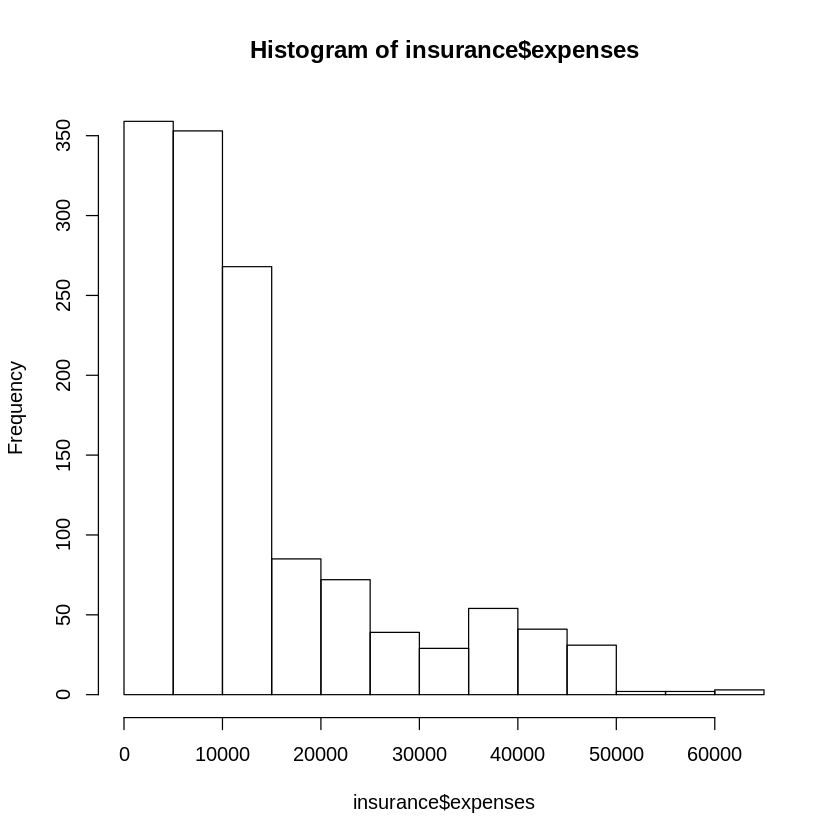

In [9]:
# histogram of insurance charges
hist(insurance$expenses)

This histogram shows that the majority of the people within the dataset have yerly medical expenses between 0 and 10'000$, even though the tail of the distribution is far past these peaks. This is not an ideal distribution for a linear regression model, however being aware of this fact helps to create a better-fitting model later on.

Another issue with the data is that three features are factor-type features rather than non-numeric variables. The feature `smoker` for example is divided into `yes` or `no`. Having a look at the feature `region` shows, that it has four levels:

In [10]:
# table of region
table(insurance$region)


northeast northwest southeast southwest 
      324       325       364       325 

The table shows that the data has been divided nearly evenly among four geographic regions. 

Prior fitting a regression model it is also advisable to determine how the independent variables are related to the dependent variable and each other. 

##### **Correlation matrix**

The **correlation matrix** provides an overview in a compact form. Given a set of varibales, it provides a correlation for each pairwise relationship. Using the R-function `cor()` and combining the input of that function will give a correlation matrix of the form:

In [11]:
# exploring relationships among features: correlation matrix
cor(insurance[c("age", "bmi", "children", "expenses")])

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


The diagonals are always 1.0, as the variable `age` for example is perfectly correlated to itself, obviously. The correlation between `children` and `bmi` for instance is 0.0126, a small but positive correlation, indicating there is a very slim correlation between having children and the body-mass-index. Such a relation makes more sense if looking at the age and the bmi, where the correlation also indicates a positive rho, with the magnitude of 0.109. The value is roughly 8-times as high as the correlation of `children` and `bmi`, which somehow makes sense. Also, the values above and beyond the diagonal are identical, since the correlation matrix is symmetrical, i.e. `cor(x,y) = cor(x,y)`. 

Having a look at the correlations between `age` and `expenses`, `bmi` and `expenses`, and `children` and `expenses` implies that those three factors have a positive effect on the expenses, meaning, if either of the three goes up, the expenses go up aswell. Such relationships can also be visualised, for example with a scatterplot matrix (SPLOM).

##### **Scatterplot matrix - SPLOM**

It would be possible to create a scatterplot for each possible relationship, however for a large number of features this quickly becomes tedious. An alternative is collecting the scatterplots into one single plot using the comand `pairs`. This is known as a **scatterplot matrix (SPLOM)**. It is used to detect
patterns among three or more variables. For this example, not all features will be included:

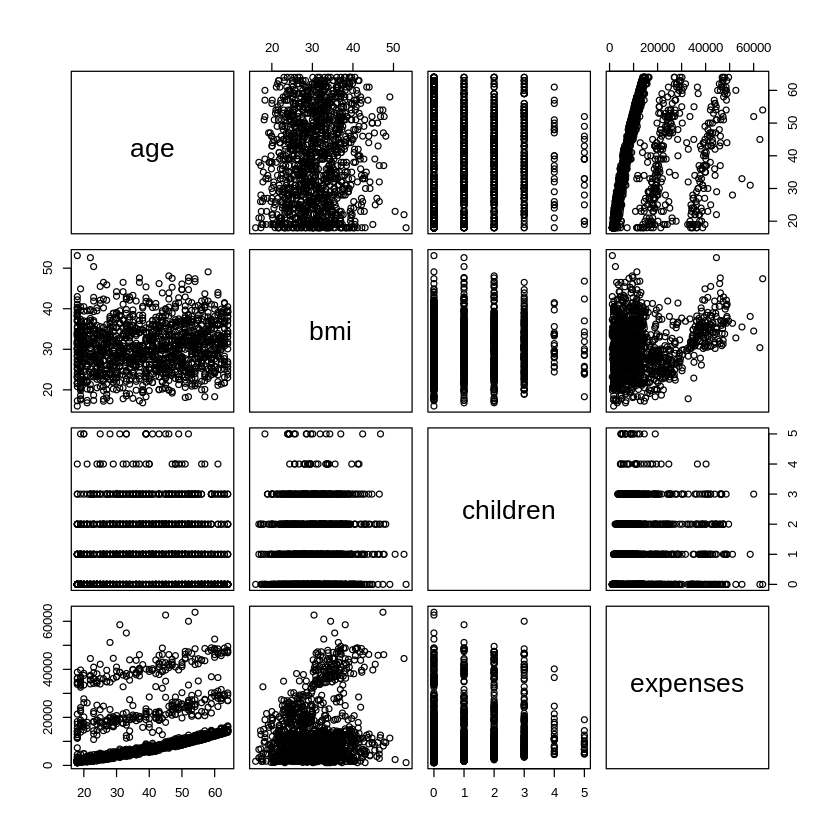

In [12]:
# visualing relationships among features: scatterplot matrix
pairs(insurance[c("age", "bmi", "children", "expenses")])

The SPLOM can be interpreted as follows, the intersection of each row and column represents the scatterplot of the variables indicated by the row and column pair. For instance, the scatterplot for `age` and `bmi` is the first square int he second column and, because of symmetry the second square in the first column. They present the same information, only the axes have been swapped. As already been figured out with the correlation matrix above, there is no strong relationship between the age and the body-mass-index, thus the scatterplot looks more like a cloud of points. However, a slight trend between the age and the expenses is evident from the graph, since there are several relatively straight lines observable, whereas the bmi vs. expenses plot has two distinct groups of points. 

Clearly, adding more information to the plot would make it more useful. An example of such plots gives the R-package `psych` with the function `pairs.panels()`. 

In [0]:
if(!require(psych)){
    install.packages("psych")
    library(psych)
}

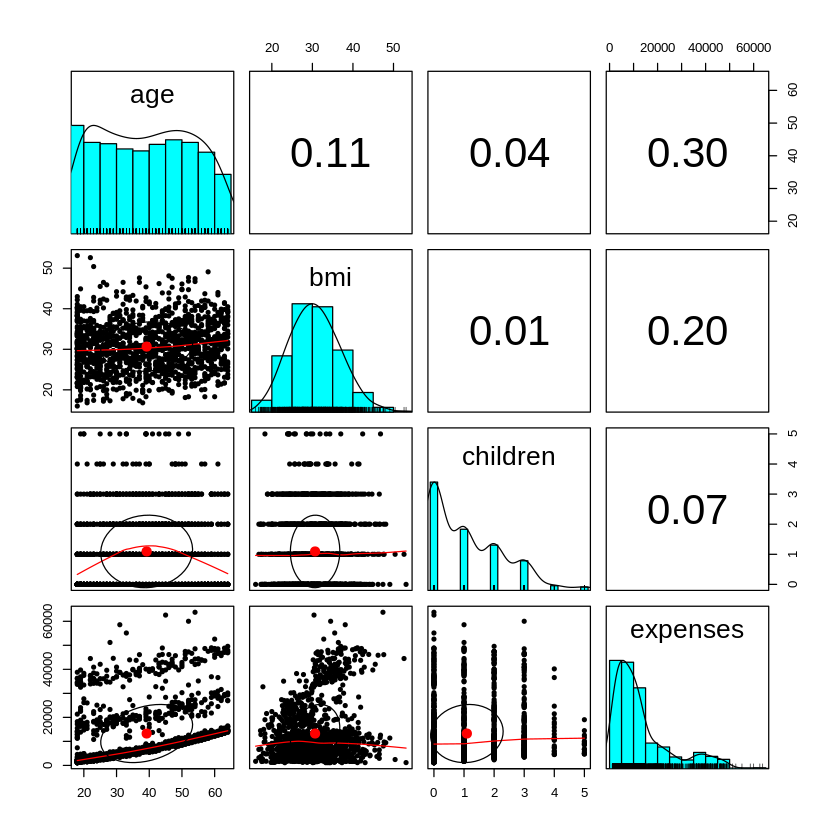

In [15]:
# create a more informative scatterplot matrix
pairs.panels(insurance[c("age", "bmi", "children", "expenses")])

In this more informative SPLOM, the entries above the diagonal have been replaced with a correlation matrix, the diagonal still displays the name of the variable, but a histogram depicting the distribution of values for each feature. And under the diagonal axis the scatterplots were extended by a **correlation ellipse**, which visualises the correlation strength. An almost perfectly round oval (as with `bmi` and `children`) shows a very weak correlation, in this case $\rho = 0.01$. Looking at the ellipse for `age` and `expenses` it is evident that the ellipse is much more stretched, indicating its stronger correlation ($\rho = 0.3$). The red dot at the centre of the ellipse reflects the means of the $x$ and $y$ axis variables. Lastly, the red curve is known as the **loess curve**, showing the general relationship between the $x$ axis variable and $y$ axis variable. For example, the loess curve for `age` and `children` shows an upside-down parabola with the peak at around the middle age. This means that the youngest and oldest people within the sample have fewer children on the insurance plan than those around the middle. As the line is u-shaped, or n-shaped respectively, the relationship is nonlinear and could have not been inferred from the correlations alone. 

#### **Step 3 - training a model on the data**

The syntax for training a model can be read as follows:


In [0]:
# Building the model
ins_model <- lm(expenses ~ age + children + bmi + sex + smoker + region,
                data = insurance)

If all features of a data set are used, the above expression could be simplified with the period character (.), which would result in the expression `lm(expenses ~ ., data = insurance)`. Both ways are equivalent. Calling the model by typing the name of the model will output the estimated beta coefficients

In [17]:
# see the estimated beta coefficients
ins_model


Call:
lm(formula = expenses ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Coefficients:
    (Intercept)              age         children              bmi  
       -11941.6            256.8            475.7            339.3  
        sexmale        smokeryes  regionnorthwest  regionsoutheast  
         -131.4          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


The intercept is the predicted value of `expenses` when the independent variables are equal to zero. However, in this case the intercept has not much explanatory power by itself, as it is almost impossible to have the value of 0 for all features. No person can exist with age 0 or bmi 0. The beta coefficients, sam as for simple linear regressions, express the slope of each feature, indicating by how much the $y$ value (`expenses`) will increase by a unit shift in $x$. For instance, assuming all other features except `age` remain constant, a unit shift in `age` (each additional year of age) would increase the `expenses` by a 256.8 on average.

Note that the model outputs eight coefficients, even though in the model formula only six were specified. This is because the `lm()` function automatically applies dummy coding to each of the factor type variables included in the model. For the interested reader, please refer to *Chapter 2 - Managing and Understanding Data*, where dummy coding is explained. However, when adding a dummy variable to a regression model, one category is always being excluded from to model to to serve as the reference category. The model above automatically left out the `sexfemale`, `smokerno` and `regionnortheast` variables. Thus, males have 131.40 less medical expenses each year relative to females and smokers cost an average of 23'847.50 more than non-smokers a year. Because the coefficient for each of the three regions is negative, this implies that the reference region `regionnortheast` tends to have the highest average expenses. R uses by default the first level of th factor as the reference. If a different level is prefered,the `relevel()` function can be used to specify the reference group manually. 

Concluding on the results, they make sense somehow. Old age, smokers and obesity tend to be linked to additional health issues, while additional familiy members may result in an increase in physician visits. Although the results are plausible, there is no indication of how well the model performs, i.e. fitting the data. 

#### **Step 4 - evaluating model performance**

In [18]:
# see more detail about the estimated beta coefficients
summary(ins_model)


Call:
lm(formula = expenses ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
bmi                339.3       28.6  11.864  < 2e-16 ***
sexmale           -131.3      332.9  -0.395 0.693255    
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 

This is the same output as for simple linear regressions. It shows a summary about the quality of the model, and is divided into three parts again; (1) the residuals, (2)the coefficients and (3) the multiple R-squared. The key insights are:


1.   The maximum error of 29'981.70 suggests that the model under-predicted expenses by alost 30'000 for at least one observation. On the other hand, 50% of the predictions fall within the 1Q and 3Q, showing that the majority of predictions were between 2'850.90 over the true value and 1'383.90 under the true value.
2.   The model has several statistically significant coefficients (3 asteriks) and only two coefficients (for `sexmale` and `regionnorthwest`) that are not statistically significant. 

3.   Adjusted R-squared is 0.7494 and indicate that the model is able to explain 74.94% of the variation in the dependent variable `expenses`. Models with more features per default explain more variaten, which is why for those models the adjusted R-squared is needed. 

It can be concluded that the model is performing quite well, taking into account that regression models of real-world data very often have low R-squared values. Thus, a value of 0.75 is very good. However, the size of some residuals is a bit concerning but not surprising, given the data. Nevertheless this model can be improved by specifying the model in a slightly different way.



#### **Step 5 - improving model performance**

As mentioned at the beginning of this chapter, the main difference between machine learning approaches and regression modelling is that machine learning approaches does selection and model specificatin automatically, whereas for regression modelling the user has to do it manually. By implication, if the user has some knowledge about how a feature is related to the outcome, this information can be used to inform the model specification and likely improve the model's performance.

##### **Adding nonlinear relationships**

The relationship between an independent variable and dependent variable is in linear regression, as the name suggests, assumed to be linear, even though this may not be true. For instance, the feature `age` may not have a constant effect on medical `expenses`, thus treating this relationship linearly could become disproportionally expensive for the oldest population. Hence, adding a new term to the model such that the model is no longer linear but rahter a polynomial is a common way in mathematics (see [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) as an example of adding terms of higher order to gain better approximations). 

To account for a nonli

In [0]:


## Step 5: Improving model performance ----

# add a higher-order "age" term
insurance$age2 <- insurance$age^2

# add an indicator for BMI >= 30
insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)

# create final model
ins_model2 <- lm(expenses ~ age + age2 + children + bmi + sex +
                   bmi30*smoker + region, data = insurance)

summary(ins_model2)

# making predictions with the regression model
insurance$pred <- predict(ins_model2, insurance)
cor(insurance$pred, insurance$expenses)

plot(insurance$pred, insurance$expenses)
abline(a = 0, b = 1, col = "red", lwd = 3, lty = 2)

predict(ins_model2,
        data.frame(age = 30, age2 = 30^2, children = 2,
                   bmi = 30, sex = "male", bmi30 = 1,
                   smoker = "no", region = "northeast"))

predict(ins_model2,
        data.frame(age = 30, age2 = 30^2, children = 2,
                   bmi = 30, sex = "female", bmi30 = 1,
                   smoker = "no", region = "northeast"))

predict(ins_model2,
        data.frame(age = 30, age2 = 30^2, children = 0,
                   bmi = 30, sex = "female", bmi30 = 1,
                   smoker = "no", region = "northeast"))